# An Instagram Account is Fake or Genuine

In [7]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def load_train_data():
    
    train_data = pd.read_csv('train.csv', header = 0)
    
    X_train = train_data.drop(columns='fake')
    y_train = train_data['fake']
    
    return X_train, y_train

In [9]:
from sklearn.datasets import load_files

def load_test_data():
    test_data = pd.read_csv('test.csv', header = 0)
    X_test = test_data.drop(columns='fake')
    y_test = test_data['fake']
    
    return X_test, y_test

Calculate train and validation score of classifier (model) using cross-validation
        
model (sklearn classifier): Classifier to train and evaluate

X (numpy.array or pandas.DataFrame): Feature matrix

y (numpy.array or pandas.Series): Target vector

scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()

cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()

returns: mean training score, mean validation score
    
 

In [10]:
from sklearn.model_selection import cross_validate

def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    train_scores = scores['train_score']
    val_scores = scores['test_score']
    
    train_mean = np.mean(train_scores)
    val_mean = np.mean(val_scores)
    
    return train_mean, val_mean

In [11]:
def print_grid_search_result(grid_search):
        
    print(grid_search.best_params_)
    
    best_train = grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
    print("best mean_train_score: {:.3f}".format(best_train))
        
    best_test = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
    print("best mean_test_score: {:.3f}".format(best_test))

In [12]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
   
    data = confusion_matrix(y_actual, y_pred)
    ax = sns.heatmap(data,
                     annot=True,
                     cbar=False,
                     fmt='d',
                     xticklabels = labels,
                     yticklabels = labels)
    ax.set_title(title)
    ax.set_xlabel("predicted values")
    ax.set_ylabel("actual values")

In [13]:
#data loading
X_data, y_data = load_train_data()
X_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB


In [14]:
X_data.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [15]:
X_data.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73
575,1,0.27,1,0.00,0,0,0,0,2,150,487


In [16]:
X_data.shape

(576, 11)

In [17]:
y_data.shape

(576,)

In [18]:
# Finding Missing  Values
X_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64

In [19]:
# Check if Imbalance in Labels
#labels is about 1:1 which means there is no imbalance in the labels.
#but here the ratio would be more 2:1.

unique, freq = np.unique(y_data, return_counts = True) 

for i, j in zip(unique, freq):
    print("Label: ", i, ", Frequency: ", j)


Label:  0 , Frequency:  288
Label:  1 , Frequency:  288


#Seeing Any Correlation in Features:

there is no correlation among the features

They are roughly around 0 in each feature comparison.

Text(0.5, 1.0, 'Correlation Heatmap Between Features')

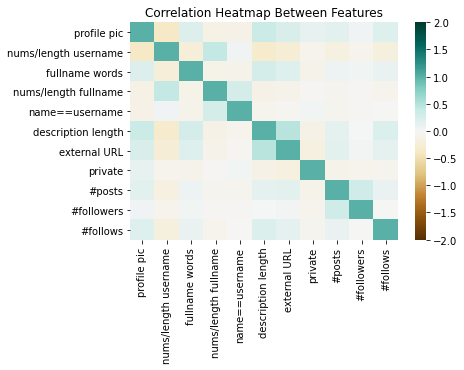

In [20]:
data_corr = X_data.corr(method='pearson')
ax = sns.heatmap(data_corr, vmin=-2, vmax=2, cmap='BrBG')
ax.set_title("Correlation Heatmap Between Features")

# Create training and test sets


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=50)

In [22]:
print(X_train.shape)
print(y_train.shape)


(460, 11)
(460,)


# Models Comparision Using Cross-Validation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

model_list = [LogisticRegression(max_iter=600),
              SVC(), 
              GaussianNB(),
              RandomForestClassifier(random_state=55),
              GradientBoostingClassifier(random_state=56)]

train_scores = []
val_scores = []



In [24]:
for model in model_list:
    train, val = get_classifier_cv_score(model, X_train, y_train,'average_precision')
    train_scores.append(train)
    val_scores.append(val)
    
models_score = sorted(list(zip(val_scores, train_scores, model_list)), reverse=True)

print("-------------------------------------")
for val, train, model in models_score:
    print("\nModel: {} ".format(model.__class__.__name__))

    print("\ntrain_score: {:.3f}".format(train)) 

    print("\nvalidation_score: {:.3f}".format(val)) 

    print("-------------------------------------")

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------------------------------------

Model: GradientBoostingClassifier 

train_score: 1.000

validation_score: 0.980
-------------------------------------

Model: RandomForestClassifier 

train_score: 1.000

validation_score: 0.980
-------------------------------------

Model: LogisticRegression 

train_score: 0.977

validation_score: 0.974
-------------------------------------

Model: SVC 

train_score: 0.936

validation_score: 0.936
-------------------------------------

Model: GaussianNB 

train_score: 0.779

validation_score: 0.793
-------------------------------------


We will select the two best models to continue.

These models are Random Forest Classifier and Gradient Boosting Classifier.



# Hyperparameter Tuning Using Grid Search


In [25]:
#Grid Search for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

model = RandomForestClassifier(random_state=55)

parameters = {'n_estimators': [300, 500, 700, 1000],
              'max_depth': [7, 9, 11, 13]}

grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)

In [26]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, scoring='average_precision')

In [27]:
print_grid_search_result(grid1)

{'max_depth': 13, 'n_estimators': 1000}
best mean_train_score: 1.000
best mean_test_score: 0.982


# Grid Search for Gradient Boosting Classifier

In [28]:
model = GradientBoostingClassifier(max_depth=5, random_state=56)

parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid2 = GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)

In [29]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='average_precision')

In [30]:
print_grid_search_result(grid2)

{'learning_rate': 1.0, 'n_estimators': 50}
best mean_train_score: 1.000
best mean_test_score: 0.978


# Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('preprocessing', StandardScaler()), ('classifier', grid1.best_estimator_)])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=13, n_estimators=1000,
                                        random_state=55))])

In [32]:
print("Test score: {:.3f}".format(pipeline.score(X_test, y_test)))


Test score: 0.922


# Final Evaluation

In [33]:
X_final, y_final = load_test_data()

In [34]:
print("Test score: {:.3f}".format(pipeline.score(X_final, y_final)))


Test score: 0.942


In [35]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_final)
print(classification_report(y_final, y_pred, target_names=["genuine", "fake"]))

              precision    recall  f1-score   support

     genuine       0.92      0.97      0.94        60
        fake       0.96      0.92      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



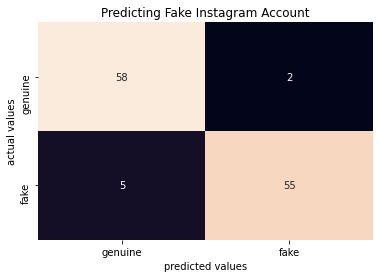

In [36]:
labels = ["genuine", "fake"]
title = "Predicting Fake Instagram Account"
plot_confusion_matrix(y_final, y_pred, labels, title)

#output:

We can see our model predicted around 91.5% fake accounts and 90.2% genuine accounts correctly

The model only predicted 7 accounts wrong